In [ ]:
import numpy as np

In [ ]:
### Mission 1, coder le rubik's cube

In [ ]:
# On commence par coder M, la matrice des face
blanc = (1,0,0,0,0,0)
jaune = (0,1,0,0,0,0)
bleu = (0,0,1,0,0,0)
rouge = (0,0,0,1,0,0)
vert = (0,0,0,0,1,0)
orange = (0,0,0,0,0,1)

rgb_blanc = (1,1,1)



In [ ]:
R_z1 = np.array([[0,0,1,0,0,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
R_z2 = np.array([[0,0,0,1,0,0],[0,0,1,0,0,0],[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
R_y1 = np.array([[0,0,0,0,0,1],[0,0,0,0,1,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[1,0,0,0,0,0],[0,1,0,0,0,0]])
R_y2 = np.array([[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,1,0,0,0,0],[1,0,0,0,0,0]])
R_x1 = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,0,1,0,0],[0,0,1,0,0,0]])
R_x2 = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,0,0,0,1],[0,0,0,0,1,0],[0,0,1,0,0,0],[0,0,0,1,0,0]])

In [ ]:
def one_hot_to_vec(x):
  return [i for i in range(len(x)) if x[i]==1][0]
def one_hot_to_rgb(x):


1

In [ ]:
def get_faces(j):
  '''
  0,1,2,3,4,5,6,7 blanches

  8,9,10,11,12,13,14,15 jaunes

  0,1,2,8,9,10,16,17 bleues

  6,7,0,14,15,8,16,18 rouges

  4,5,6,12,13,14,18,19 vertes

  2,3,4,10,11,12,17,20 oranges

  z1 blanc
  x1 bleu
  y1 orange

  z2 jaune
  x2 vert
  y2 rouge
  '''

  l = [0 for _ in range(6)]
  #On commence par la face blanche
  if j in [0,1,2,3,4,5,6,7]:
    l = [l[i]+blanc[i] for i in range(6)]
  #jaune
  if j in [8,9,10,11,12,13,14,15]:
    l = [l[i]+jaune[i] for i in range(6)]
  #bleu
  if j in [0,1,2,8,9,10,16,17]:
    l = [l[i]+bleu[i] for i in range(6)]
  #rouge
  if j in [6,7,0,14,15,8,16,18]:
    l = [l[i]+rouge[i] for i in range(6)]
  #vert
  if j in [4,5,6,12,13,14,18,19]:
    l = [l[i]+vert[i] for i in range(6)]
  #orange
  if j in [2,3,4,10,11,12,17,20]:
    l = [l[i]+orange[i] for i in range(6)]
  return l


In [ ]:
M = [get_faces(i) for i in range(20)]

<ipython-input-21-32de2b66ddce>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


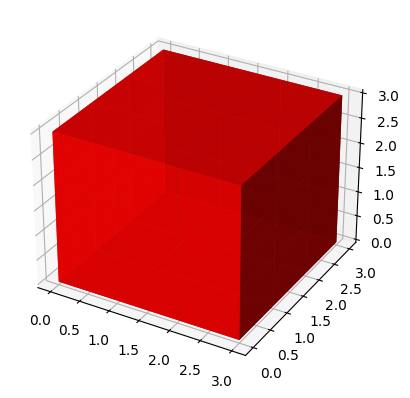

In [ ]:
# Display rubik's cube
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create axis
axes = [3,3,3]

# Create Data
data = np.ones(axes, dtype=np.bool)

# Control Transparency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors);

In [ ]:
def scalar(x):
  return [int(sum(x[i])>=1) for i in range(6)]


'''
axe
'''
z1 = np.array([0,0,0,0,1,0])
z2 = np.array([0,0,0,0,0,1])
y1 = np.array([0,0,1,0,0,0])
y2 = np.array([0,0,0,1,0,0])
x1 = np.array([1,0,0,0,0,0])
x2 = np.array([0,1,0,0,0,0])

def calculR(axe):
  if np.dot(axe,z1) == 1 :
    return R_z1
  if np.dot(axe,z2) == 1 :
    return R_z2
  if np.dot(axe,x1) == 1 :
    return R_x1
  if np.dot(axe,x2) == 1 :
    return R_x2
  if np.dot(axe,y1) == 1 :
    return R_y1
  if np.dot(axe,y2) == 1 :
    return R_y2